## Retention Rate

In [1]:
import pandas as pd
df = pd.read_csv("10_05_2021.csv", parse_dates = ["start_date", "end_date"])

/home/thetz/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Retention rate:

Children Services: 81.28%
Adult Services: 89.67%
Administrative Services: 87.95%
Finance and Forecasting: 90.0%
Self Sufficiency: 86.45%
Public Authority: 86.44%


<BarContainer object of 6 artists>

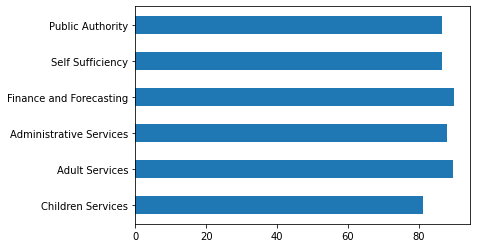

In [2]:
import matplotlib.pyplot as plt

divisions = ['Children Services', 'Adult Services', 'Administrative Services', 'Finance and Forecasting', 'Self Sufficiency', 'Public Authority']
retention_rates = []
print("Retention rate:\n")
for division in divisions:
    #Employees working at the start of the period
    new_df = df[df['division'] == division].copy()
    new_df['end_date'] = new_df['end_date'].fillna(pd.to_datetime('2021-11-01'))

    #Number of employees at the start of the period
    starting_employees = new_df[(new_df['end_date'] > "2020-10") & (new_df['start_date'] <= "2020-10")]
    starting_employees_ids = starting_employees.emplid_sec.unique()
    start = starting_employees_ids.size

    #Number of employees left at the end of the period
    ending_employees = new_df[pd.DataFrame(new_df['emplid_sec'].tolist()).isin(starting_employees_ids).any(1).values]
    end = ending_employees[ending_employees['end_date'] > "2021-10"].emplid_sec.unique().size

    #Output the results
    #print("start: " + str(start))
    #print("end: " + str(end))
    rr = round(end / start * 100, 2)
    retention_rates.append(rr)
    print(division + ": " + str(rr) + "%")

plt.barh(divisions, retention_rates, height=0.5)

The retention rate in the past year between different divisions are all around 80-90%. Childern Services division has the **lowest** retention rate at 81.28% and Finance and Forecasting division has the **highest** retention rate at 90%.

<AxesSubplot:>

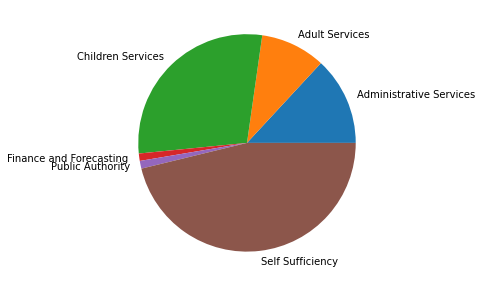

In [3]:
df[df['division'] != "Other"].drop_duplicates(subset='emplid_sec', keep='last').groupby('division')['emplid_sec'].count().plot.pie(ylabel='', figsize=(5,5))

If we look at the number of employees in each division, Self Sufficiency makes up a majority of the workforce.

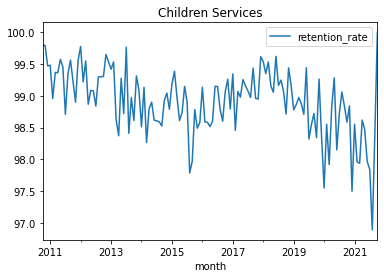

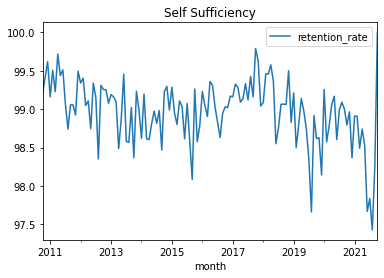

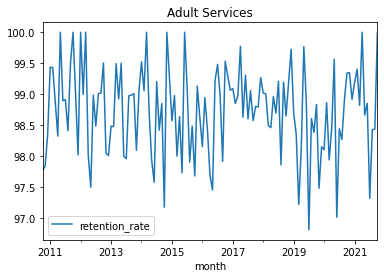

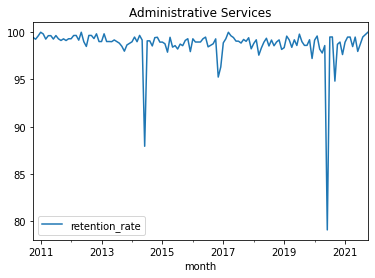

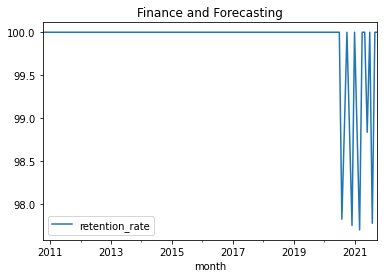

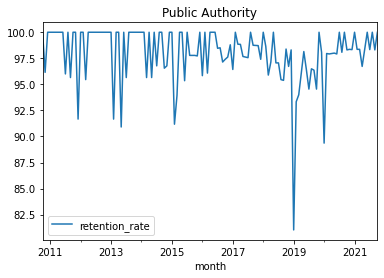

In [4]:
from pandas.tseries.offsets import DateOffset

def calc_retention_rate(df, division = ""):
    #Current employees have no ending date, replace with today's date
    new_df = df[df['division'].str.contains(division)].copy()
    new_df['end_date'] = new_df['end_date'].fillna(pd.to_datetime('2021-11-02'))

    #Generate a list of months
    months = pd.date_range('2010-10-01', '2021-10-01', freq='MS')

    #Variable to store the retention rate for each month
    retention_rates = []
    starting_count = []
    ending_count = []

    #Loop through each month
    for month in months:
        #Employees working at the start of the period
        starting_employees = new_df[(new_df['end_date'] > month) & (new_df['start_date'] <= month)]
        starting_employees_ids = starting_employees.emplid_sec.unique()
        #Number of employees at the start of the period
        s = starting_employees_ids.size
        starting_count.append(s)
        
        #Number of employees at the end of the period
        offsetMonth = month + DateOffset(months=1)
        ending_employees = new_df[pd.DataFrame(new_df['emplid_sec'].tolist()).isin(starting_employees_ids).any(1).values]
        e = ending_employees[ending_employees['end_date'] > offsetMonth].emplid_sec.unique().size
        ending_count.append(e)
        #Calculate retention rate
        if(s == 0 & e == 0):
            retention_rates.append(100)
        else:
            retention_rates.append(e / s * 100)

    #Create a dataframe containing 4 columns: month, staring_count, ending_count, and retention_rates
    retention_df = months.to_frame(index=False, name='month')
    retention_df['starting_count'] = starting_count
    retention_df['ending_count'] = ending_count
    retention_df['retention_rate'] = retention_rates

    #Create visualizations
    retention_df.plot(kind='line', x='month', y='retention_rate', title=division)
    
    return retention_df
    
cs_df = calc_retention_rate(df, "Children Services")
ss_df = calc_retention_rate(df, "Self Sufficiency")
as_df = calc_retention_rate(df, "Adult Services")
admin_df = calc_retention_rate(df, "Administrative Services")
ff_df = calc_retention_rate(df, "Finance and Forecasting")
pa_df = calc_retention_rate(df, "Public Authority")

If we look at the montly retention rate from 2010, all of them are over 90% which is good. For Public Authority, there was a dip in retention rate to around 80% and it looks like there's a dip at every end of the year.